In [1]:
# Exploratory Data Analysis
# Univariate Data Analysis

# Exploratory Data Analysis Purpose:
# • Understanding the distributions of the variables
# • Understanding the relationships between two or more variables
# • Detecting patterns that can't be found using numerical calculations
# • Spotting anomalies or outliers in the data
# • Formulating a hypothesis about causal relationships
# • Informing us about how to engineer new variables (feature engineering)
# • Informing us about possible formal inferential statistical tests

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%cd "C:\Users\jwill\Documents\Machine Learning\Data"

C:\Users\jwill\Documents\Machine Learning\Data


In [4]:
# load data
games = pd.read_csv('appstore_games2.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          4311 non-null   object 
 1   subtitle                      1788 non-null   object 
 2   average_user_rating           4311 non-null   float64
 3   user_rating_count             4311 non-null   float64
 4   price                         4311 non-null   float64
 5   in-app_purchases              2998 non-null   object 
 6   description                   4311 non-null   object 
 7   developer                     4311 non-null   object 
 8   age_rating                    4311 non-null   object 
 9   languages                     4311 non-null   object 
 10  size                          4311 non-null   float64
 11  primary_genre                 4311 non-null   object 
 12  genres                        4311 non-null   object 
 13  ori

In [5]:
# the columns that are conceptually numerical have datatypes of float64: 
# average_user_rating, user_rating_count, price, and size 
# useful visualization for a single numerical variable is the histogram

# transform variable from bytes to megabytes
games['size'] = games['size']/1e6

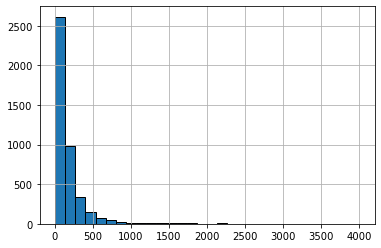

In [6]:
# histogram
games['size'].hist(bins=30, ec='black');

In [7]:
games['size'].describe()

count    4311.000000
mean      175.956867
std       286.627800
min         0.215840
25%        40.736256
50%        97.300480
75%       208.517632
max      4005.591040
Name: size, dtype: float64

In [8]:
# look at the extreme values
games['size'].sort_values(ascending=False).head(12)

3497    4005.591040
2889    3916.692480
1334    3747.742720
3457    3716.897792
3248    3599.435776
1895    3518.277632
2891    3321.082880
2008    2996.021248
3725    2897.696768
3671    2581.730304
3578    2547.534848
3547    2512.028672
Name: size, dtype: float64

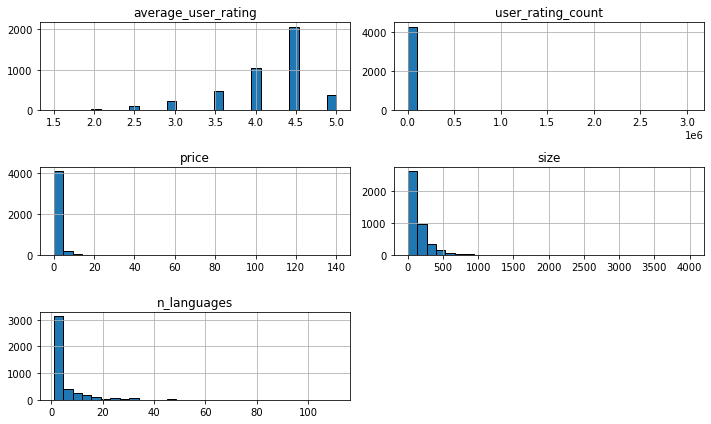

In [10]:
# place all numerical variable in a grid of histograms
games.hist(figsize = (10, 6), bins = 30, ec = 'black');
# This line prints the four plots without overlap
plt.tight_layout()

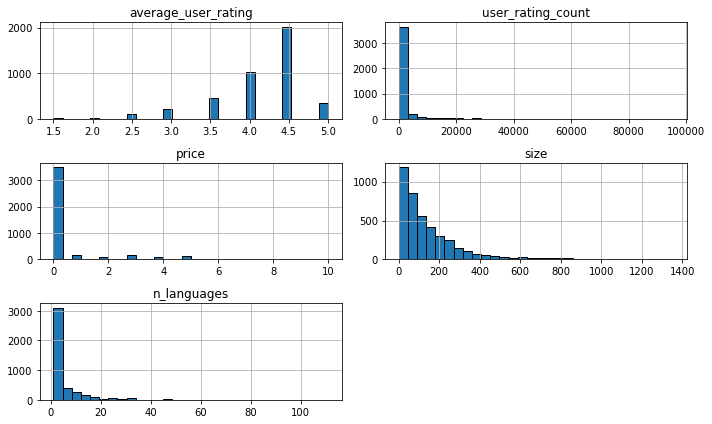

In [12]:
# to better visualize the data
# create a filter that will exclude the 1% of largest values

filter_price = games['price'] <= games['price'].quantile(0.99)
filter_user_rating_count = games['user_rating_count'] \
                          <= games['user_rating_count'].quantile(0.99)
filter_size = games['size'] <= games['size'].quantile(0.99)
filter_exclude_top_1_percent = filter_price \
                               & filter_user_rating_count \
& filter_size
games[filter_exclude_top_1_percent].hist(figsize = (10, 6),\
                                         bins = 30, ec = 'black');

# prints the plots 
plt.tight_layout()

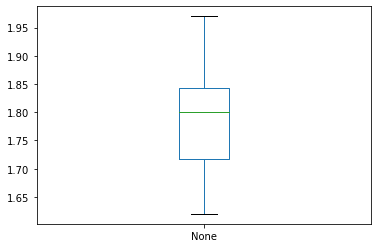

In [14]:
# Box Plots
# visualize the data divided into quartiles

# data
mens_heights = pd.Series\
               ([1.68, 1.83, 1.75, 1.8, 1.88, 1.8, 1.89, 1.84,\
                 1.9, 1.65, 1.67,1.62, 1.81, 1.73, 1.84, 1.78,\
                 1.76, 1.97, 1.81, 1.75, 1.65, 1.87, 1.85, 1.64])

# box plot
mens_heights.plot(kind='box');

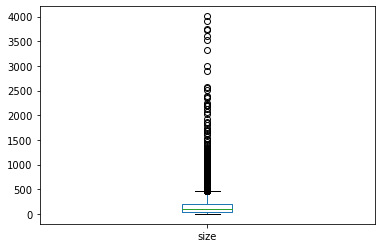

In [15]:
# Outliers
#observation is above Q3 + 1.5 x IQR or below Q1 - 1.5 x IQR) are plotted as dots
games['size'].plot(kind='box');

In [16]:
# Bar plots
# categorical values
games['age_rating'].value_counts()

4+     2287
9+      948
12+     925
17+     151
Name: age_rating, dtype: int64

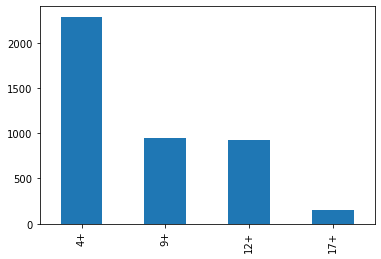

In [17]:
games['age_rating'].value_counts().plot(kind = 'bar');

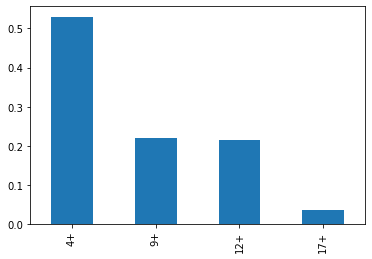

In [18]:
# normalize to show proportions
games['age_rating'].value_counts(normalize=True).plot(kind='bar');

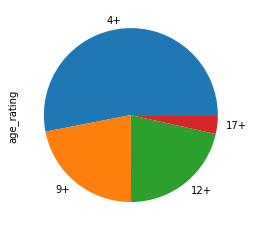

In [19]:
# Pie chart
games['age_rating'].value_counts().plot(kind = 'pie');

In [20]:
percentages = 100*games['age_rating'].value_counts(normalize=True)
for k, x in percentages.items():
    print(f'{k}: {x:0.1f}%')

4+: 53.1%
9+: 22.0%
12+: 21.5%
17+: 3.5%
